┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


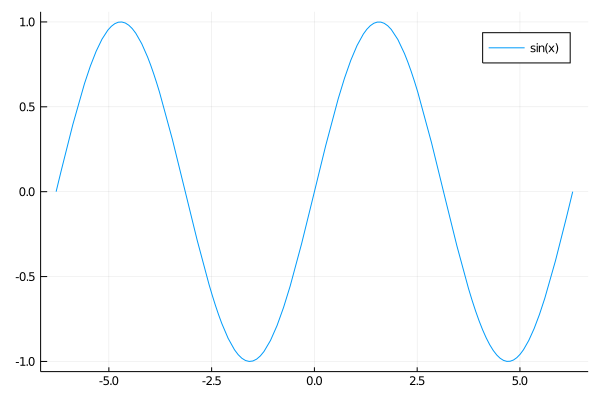

In [1]:
using Plots
gr(fmt=:png);
plot(sin, -2π, 2π, label="sin(x)")

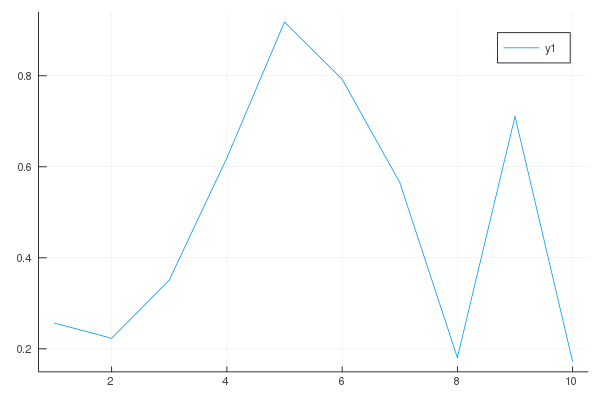

In [3]:
x = 1:10; y = rand(10); # These are the plotting data
plot(x, y)

In [4]:
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

plot(ϵ)


ϵ_sum = 0.0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val 
    end 
ϵ_mean = ϵ_sum / m




-0.6492179242311258

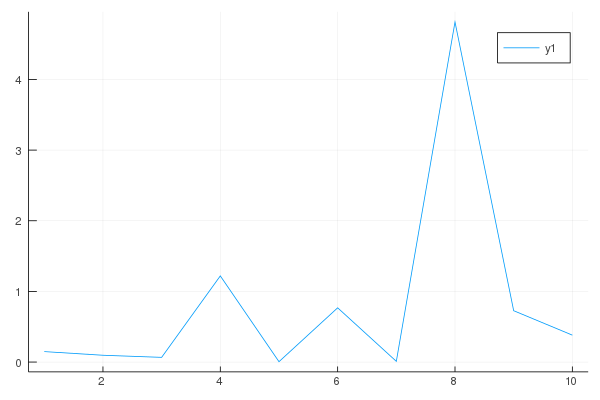

In [14]:
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
        end
    return ϵ
end

data = generatedata(10)

plot(data)

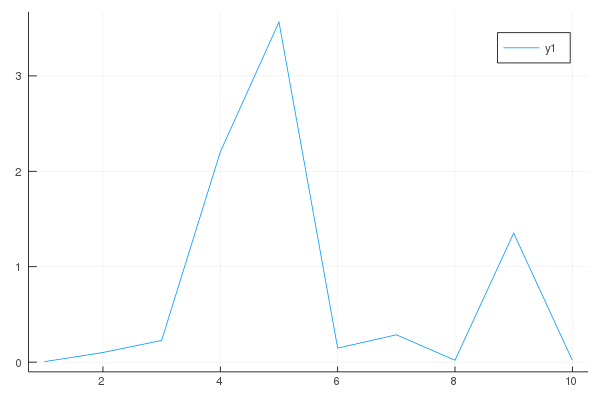

In [16]:
function generatedata(n)
    ϵ = randn(n)
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
        end
    return ϵ
end

data = generatedata(10)

plot(data)

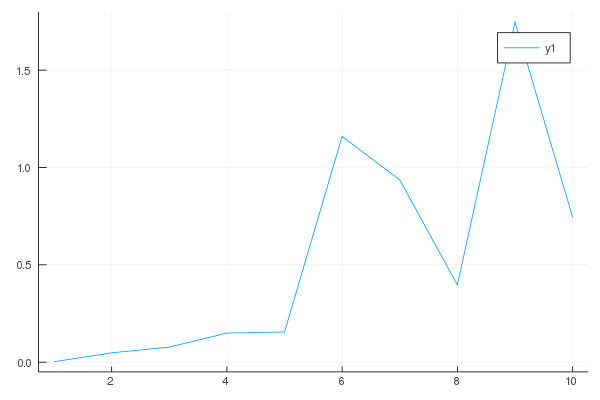

In [17]:
function generatedata(n)
    ϵ = randn(n)
    return ϵ.^2
end

data = generatedata(10)

plot(data)

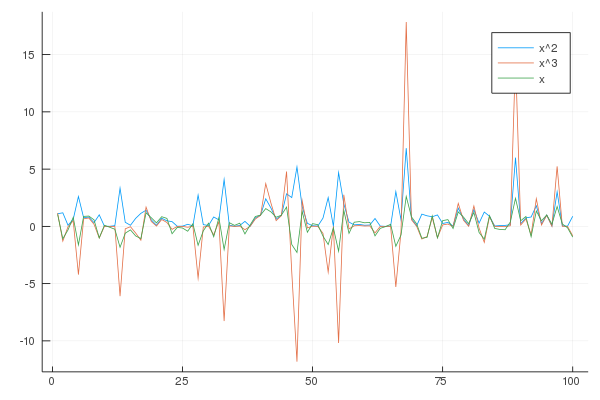

In [25]:
n = 100 
f(x) = x^2
g(x) = x^3
x = randn(n)
plot(f.(x), label = "x^2")
plot!(g.(x), label = "x^3")
plot!(x, label = "x")


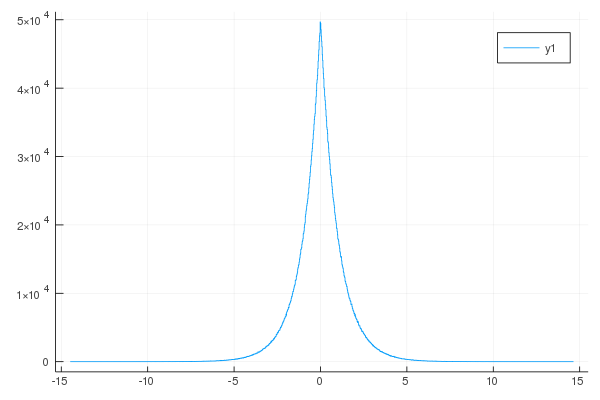

In [34]:
using Distributions
 
function plothistogram(distribution, n)
    ϵ = rand(distribution,n)
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp,5000000)

In [35]:
Laplace()

Laplace{Float64}(μ=0.0, θ=1.0)

In [37]:
p = 1.0 
β = 0.9 
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8


#setup the algorithm 

v_old = v_iv
normdiff = Inf
inter = 1

while normdiff > tolerance && inter  <= maxiter 
    v_new = p + β * v_old # the f(v) map 
    normdiff = norm(v_new - v_old)
    #replace and continue
    v_old = v_new 
    inter = inter + 1
end 

println( "Fiex point = $v_old, and |f(x)-x| = $normdiff in $inter iterations")

Fiex point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [39]:
#setup the algorithm 

v_old = v_iv
normdiff = Inf
inter = 1

for i in 1:maxiter
    v_new = p + β * v_old
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance 
        inter = i 
        break 
    end
    
    #replace and continue 
    v_old = v_new
end

println( "Fiex point = $v_old, and |f(x)-x| = $normdiff in $inter iterations")

Fiex point = 9.999999081896231, and |f(x)-x| = 9.181037796679448e-8 in 154 iterations


In [43]:
# better, but still poor style

function v_fp(β,p,v_iv, tolerance, maxiter)
    v_old = v_iv 
    normdiff = Inf
    inter = 1 
    while normdiff > tolerance && inter  <= maxiter 
        v_new = p + β * v_old
        normdiff = norm(v_new - v_old)

        v_old = v_new
        inter = inter + 1
    end
    return (v_old, normdiff, inter)
end

p = 1.0 
β = 0.9 
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8

v_star, normdiff, inter =  v_fp(β,p,v_iv, tolerance, maxiter)

println( "Fiex point = $v_old, and |f(x)-x| = $normdiff in $inter iterations")


Fiex point = 9.999999081896231, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [8]:
using LinearAlgebra
function fixedpointmap(f, iv, tolerance, maxiter)
    
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance  && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

p = 1.0
β = 0.9
f(v) = p + β * v

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)

println( "Fiex point = $v_star, and |f(x)-x| = $normdiff in $iter iterations")


Fiex point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [10]:
function fixedpointmap(f; iv, tolerance, maxiter) #note that all function parameters after the ; must be called by name
    
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance  && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff = normdiff, iter = iter) # A name tiple
end

p = 1.0
β = 0.9
f(v) = p + β * v

sol = fixedpointmap(f, iv = 0.8, tolerance = 1.0E-7, maxiter = 1000)
println( "Fiex point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")


Fiex point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [12]:
r = 2.0
f(x) = r * x * (1 - x)

sol = sol = fixedpointmap(f, iv = 0.8, tolerance = 1.0E-7, maxiter = 1000)
println( "Fiex point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")

Fiex point = 0.4999999999999968, and |f(x)-x| = 3.979330237546819e-8 in 7 iterations


In [17]:
using NLsolve 

p = 1.0
β = 0.9

f(v) = p .+ β * v
sol = fixedpoint(f,[0.8])
println( "Fiex point = $(sol.zero), and |f(x)-x| = $(norm(f(sol.zero ) - sol.zero)) in " * "$(sol.iterations) iterations")

Fiex point = [9.999999999999972], and |f(x)-x| = 3.552713678800501e-15 in  3 iterations


In [19]:
p = 1.0
β = 0.9
iv = [0.8]

sol = fixedpoint(v -> p .+ β * v, iv)
println( "Fiex point = $(sol.zero), and |f(x)-x| = $(norm(f(sol.zero ) - sol.zero)) in " * "$(sol.iterations) iterations")

Fiex point = [9.999999999999972], and |f(x)-x| = 3.552713678800501e-15 in 3 iterations


In [22]:
function fixedpointmap(f; iv, tolerance, maxiter = 1000) #note that all function parameters after the ; must be called by name
    
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance  && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff = normdiff, iter = iter) # A name tiple
end



p = [1.0, 2.0]
β = 0.9 
iv = [0.8, 2.0]
f(v) = p .+ β * v



sol = fixedpointmap(f,iv = iv, tolerance = 1.0E-8)
println( "Fiex point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")

Fiex point = [9.999999961080519, 19.999999923853192], and |f(x)-x| = 9.501826248250528e-9 in 184 iterations


In [24]:
using NLsolve

p = [1.0, 2.0]
β = 0.9 
iv = [0.8, 2.0]

sol = fixedpoint(v -> p .+ β * v, iv)
println( "Fiex point = $(sol.zero), and |f(x)-x| = $(norm(f(sol.zero ) - sol.zero)) in " * "$(sol.iterations) iterations")

Fiex point = [10.000000000000004, 20.000000000000007], and |f(x)-x| = 0.0 in 3 iterations


In [25]:
using NLsolve, StaticArrays

p = @SVector[1.0, 2.0, 0.1]
β = 0.9
iv = @SVector [0.8, 2.0, 51.0]

sol = fixedpoint(v -> p .+ β * v, iv)
println( "Fiex point = $(sol.zero), and |f(x)-x| = $(norm(f(sol.zero ) - sol.zero)) in " * "$(sol.iterations) iterations")

Fiex point = [9.999999999999998, 20.0, 1.0], and |f(x)-x| = 0.0 in 3 iterations


In [35]:
#Exercise 1 

function factorial(n)
    val = 1 
    for i in 1:n
        val = i * val
    end
    return val 
end

n_! = factorial(12)



479001600

In [2]:
#Exercise 2

function binomial_rv(n,p)
    count = 0
    u = rand(n)
    for i in 1:n
        if u[i] < p
            count = count + 1 
        end
    end
    return count
end

bi = binomial_rv(10, 0.5)

4

In [8]:
#Exercise 3

n = 100000000
count = 0 
for i in 1:n
    u,v  = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)
    if d < 0.5
        count += 1 
    end
end 

area_estimate = count/n

print(area_estimate * 4)

3.14162244

In [1]:
#Exercise 4

gain = 0
count = 0

for i in 1:10
    u  =rand()
    if u< 0.5
        count += 1
    else 
        count = 0 
    end
    if count == 3
        gain = 1 
    end
end 



print(gain)

0

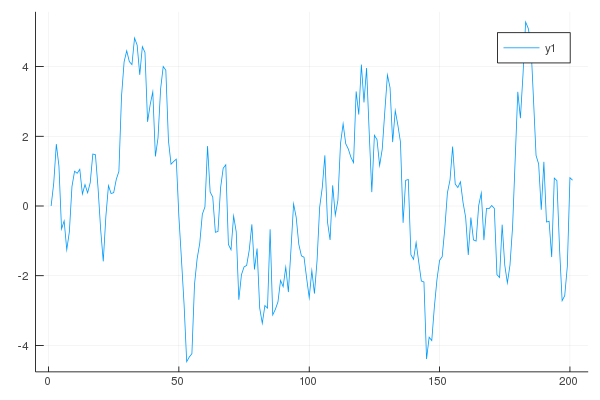

In [5]:
#Exercise 5

using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks

n = 200
x = zeros(n+1)
α = 0.9
for i in 1:n
    x[i + 1] = α * x[i] +randn()
end 

plot(x)

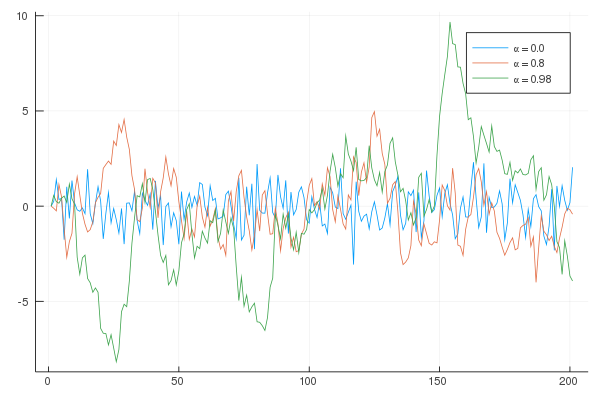

In [9]:
#Exercise 6

using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks

α = [0, 0.8, 0.98]
n = 200
p = plot()

for a in α
    x = zeros(n+1)
    for i in 1:n
        x[i + 1] = a * x[i] +randn()
    end
    plot!(p,x, label = "α = $a")
end
    

p

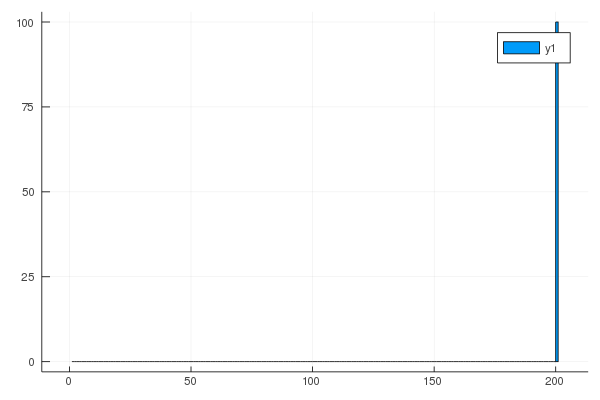

In [3]:
#Exercise 7　ver.1

using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks



n = 100
t_max = 200
a = 0 

h = histogram()

σ = 0.2
αs = [0.8, 1.0, 1.2] 

t_0 = zeros(n)

p = plot()

    for i in 1:n
        x = zeros(t_max + 1)
        x[1] = 1
        t_0_i = 0
        for t in 1:t_max
            x[t + 1] = αs[3] * x[t] + σ * randn()
            if x[t] > a
                t_0_i += 1
            else 
                x[t + 1] = 0
                t_0_i += 0  
            end
        end
        t_0[i] = t_0_i
    end

t_0_max = maximum(t_0) + 1 
histogram(t_0, bins = 1:t_0_max)


In the following version, I made a function to draw a histogram. I think that the ver2 is better in the following sence
1. this 

  0.090913 seconds (111.47 k allocations: 5.521 MiB)


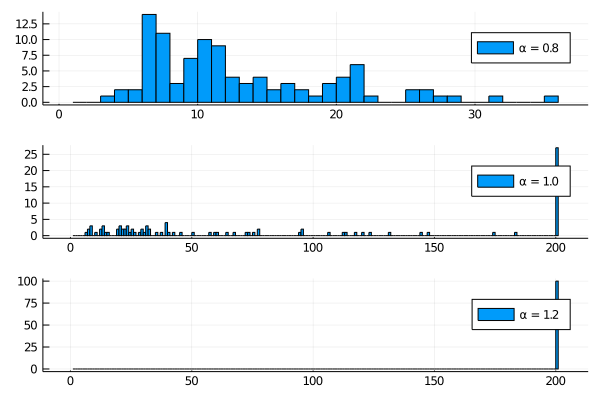

In [35]:
#Exercise 7 ver.2

using Plots, Distributions


@time begin
gr(fmt=:png); # setting for easier display in jupyter notebooks

function histogram_first_passage_time(α, σ, n, t_max)
    function T_thereshold(thereshold, t_max)
        x = zeros(t_max + 1)
        x[1] = 1
        for t in 1:t_max
            x[t + 1] = α * x[t] + σ * randn()
            if x[t] <= thereshold
                return t
            end
        end
        return t_max
    end 
    
    t_0 = zeros(n)
        for i in 1:n
            t_0[i] = T_thereshold(thereshold, t_max)
        end
    
    t_0_max = maximum(t_0) + 1 
    return histogram(t_0, bins = 1:t_0_max, label = "α = $α")
end



n = 100
t_max = 200
thereshold = 0
αs = [0.8, 1.0, 1.2] 
σ = 0.2




h1 = histogram_first_passage_time(αs[1], σ, n, t_max)
h2 = histogram_first_passage_time(αs[2], σ, n, t_max)
h3 = histogram_first_passage_time(αs[3], σ, n, t_max)


plot(h1,h2,h3, layout = (3,1),legend = true)

end

  0.058262 seconds (84.92 k allocations: 3.737 MiB)


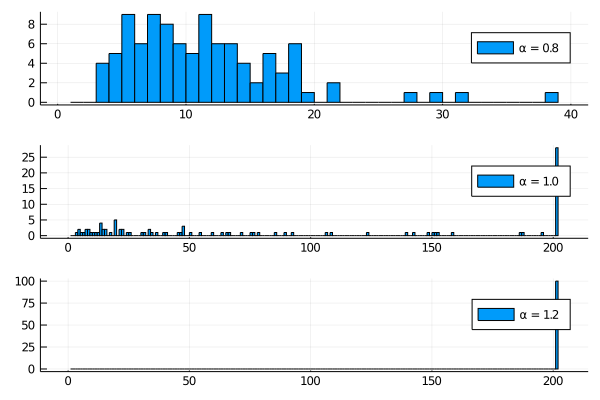

In [40]:
#Exercise 7 ver.3

using Plots, Distributions

@time begin

function hist(α; σ = 0.2, n = 100, t_max = 200, threshold = 0)
    t  = zeros(n) 
    for i in 1:n
        x_old = 1
        t_n = 0 
        while x_old > threshold　&& t_n ≤ t_max
            x_old = α * x_old + σ * randn()
            t_n += 1  
        end             
        t[i] = t_n
    end
    t_max = maximum(t)
    return histogram(t, bins = 1:t_max+1, label = "α = $α")
end

αs = [0.8, 1.0, 1.2] 

h1 = hist(αs[1])
h2 = hist(αs[2])
h3 = hist(αs[3])

plot(h1,h2,h3, layout = (3,1),legend = true)

    
end

In [10]:

# Exercise 8(a)


using LinearAlgebra

function fixedpointmap(f,f_prime , x_0, tolerance, maxiter)
    x_old = x_0
    normdiff = Inf
    iter = 1
    while normdiff > tolerance  && iter <= maxiter
        x_new = x_old - f(x_old)/f_prime(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff = normdiff, iter = iter) # A name tiple
end

# functional forms 
f(x) = (x - 1)^3
f_prime(x) = 3(x - 1)^2 


# parameters 
x_0 = 0.8
maxiter = 1000
tolerance = 1.0E-7

sol = fixedpointmap(f,f_prime, x_0, tolerance, maxiter)
println( "Fiex point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")


Fiex point = 0.9999998626477024, and |f(x)-x| = 6.867614876782113e-8 in 36 iterations


In [15]:
# Exercise 8(b) ver.1

using LinearAlgebra, ForwardDiff

function fixedpointmap(f,x_0, tolerance, maxiter)
    x_old = x_0
    normdiff = Inf
    iter = 1
    f_prime = x -> ForwardDiff.derivative(f, x)
    while normdiff > tolerance  && iter <= maxiter
        x_new = x_old - f(x_old)/f_prime(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff = normdiff, iter = iter) # A name tiple
end

# functional forms 
f(x) = (x - 1)^3

# parameters 
x_0 = 0.8
maxiter = 1000
tolerance = 1.0E-7

sol = fixedpointmap(f, x_0, tolerance, maxiter)
println( "Fiex point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")





Fiex point = 0.9999998626477024, and |f(x)-x| = 6.867614876782113e-8 in 36 iterations


In [20]:
# Exercise 8(b) ver.2 Try not to use global variables


using LinearAlgebra, ForwardDiff

function fixedpointmap(f; x_0, tolerance, maxiter)
    x_old = x_0
    normdiff = Inf
    iter = 1
    f_prime = x -> ForwardDiff.derivative(f, x)
    while normdiff > tolerance  && iter <= maxiter
        x_new = x_old - f(x_old)/f_prime(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff = normdiff, iter = iter) # A name tiple
end

# functional forms 
f(x) = (x - 1)^3


sol = fixedpointmap(f; x_0 = 0.8, tolerance = 1.0E-7, maxiter = 1000)
println( "Fiex point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")




Fiex point = 0.9999998626477024, and |f(x)-x| = 6.867614876782113e-8 in 36 iterations


In [5]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` in `collection`. If `collection` is an ordered container, the items are inserted at the end (in the given order).

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

If `collection` is ordered, use [`append!`](@ref) to add all the elements of another collection to it. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`. For `AbstractSet` objects, [`union!`](@ref) can be used instead.

---

```
push!(q::Deque{T}, x)
```

Add an element to the back

---

```
push!(s::IntDisjointSets{T})
```

Make a new subset with an automatically chosen new element x. Returns the new element. Throw an `ArgumentError` if the capacity of the set would be exceeded.

---

```
push!(s::DisjointSets{T}, x::T)
```

Make a new subset with an automatically chosen new element x. Returns the new element.

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k)
```

Argument `sc` is a SortedSet and `k` is a key. This inserts the key into the container. If the key is already present, this overwrites the old value. (This is not necessarily a no-op; see below for remarks about the customizing the sort order.) The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(cb::CircularBuffer, data)
```

Add an element to the back and overwrite front if full.
